In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import importlib
import helper_functions
importlib.reload(helper_functions)

from helper_functions import *

In [3]:
f = h5py.File('../data/Outfile_CellInformation.h5','r')

In [4]:
# for x in f.keys():
#     print(x)

## Energy Distributions

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


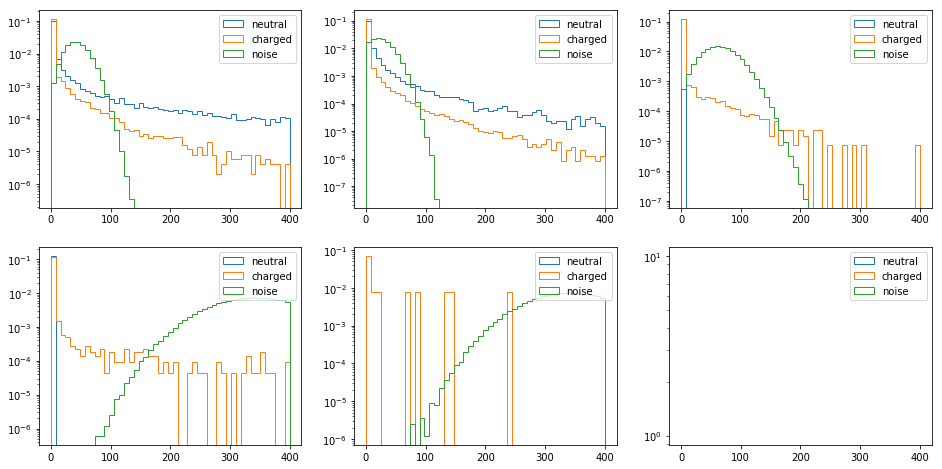

In [5]:
fig,ax = plt.subplots(2,3,figsize=(16,8))

for layer_i in range(6):
    
    ax_i = ax[int(layer_i /3)][int(layer_i % 3)]
    
    charged_energy = f['RealRes_ChargedEnergy_Layer'+str(layer_i+1)][:].flatten()
    charged_energy = charged_energy[charged_energy > 0]

    neutral_energy = f['RealRes_NeutralEnergy_Layer'+str(layer_i+1)][:].flatten()
    neutral_energy = neutral_energy[neutral_energy > 0]

    noise =  f['RealRes_TotalEnergy_Layer'+str(layer_i+1)][:].flatten() \
                -f['RealRes_ChargedEnergy_Layer'+str(layer_i+1)][:].flatten() \
                    -f['RealRes_NeutralEnergy_Layer'+str(layer_i+1)][:].flatten()
    noise = noise[noise > 0]

    ax_i.hist(neutral_energy,density=True,bins=np.linspace(0,400,50),label='neutral',histtype='step')
    ax_i.hist(charged_energy,density=True,bins=np.linspace(0,400,50),label='charged',histtype='step')
    ax_i.hist(noise,density=True,histtype='step',bins=np.linspace(0,400,50),label='noise')
    ax_i.legend()
    ax_i.set_yscale('log')
plt.show()


## fraction distributions

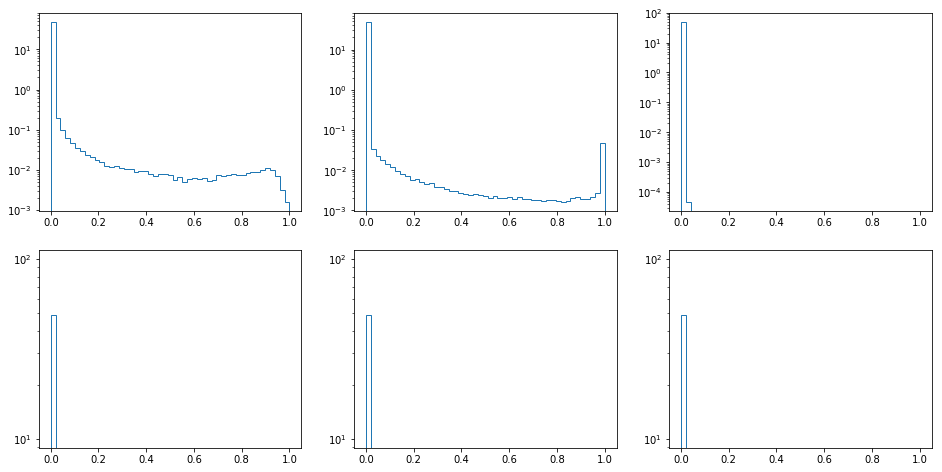

In [6]:
target_fractions = {}


for layer_i in range(6):
    total_energy = f['RealRes_TotalEnergy_Layer'+str(layer_i+1)][:].flatten()
    total_energy[total_energy < 0] = 0
    neutral_energy = f['RealRes_NeutralEnergy_Layer'+str(layer_i+1)][:].flatten()
    neutral_energy[neutral_energy > total_energy] = total_energy[neutral_energy > total_energy]
    target_fractions[layer_i+1] = np.zeros(len(neutral_energy))
    target_fractions[layer_i+1][total_energy > 0] = neutral_energy[total_energy > 0]/total_energy[total_energy > 0]

fig,ax = plt.subplots(2,3,figsize=(16,8))

for layer_i in range(6):
    
    ax_i = ax[int(layer_i /3)][int(layer_i % 3)]
    


    ax_i.hist(target_fractions[layer_i+1],density=True,bins=np.linspace(0,1,50),histtype='step')
    
    ax_i.set_yscale('log')
plt.show()

# Event display

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
norm = plt.Normalize()

event_index = 566

fig = plt.figure(figsize=(6*4,8))



ax_list = []
for layer_i in range(6):
    for res_i, res in enumerate(['RealRes','UniformRes']):
    
        ax_list.append( fig.add_subplot(2, 6, layer_i+1+6*res_i, projection='3d') ) 
        if layer_i+1+6*res_i == 1:
            ax_list[-1].set_title('Low Resolution',fontsize=25)
        elif layer_i+1+6*res_i == 7:
            ax_list[-1].set_title('High Resolution',fontsize=25)
        ax_list[-1].view_init(elev=30, azim=-30)

        X = f[res+'_TotalEnergy_Layer'+str(layer_i+1)][event_index]
        X_charged = f[res+'_ChargedEnergy_Layer'+str(layer_i+1)][event_index]
        X_neutral = f[res+'_NeutralEnergy_Layer'+str(layer_i+1)][event_index]
        
        layer_size = X.shape[1]
        X = X.reshape(layer_size,layer_size)
        X_charged = X_charged.reshape(layer_size,layer_size)
        X_neutral = X_neutral.reshape(layer_size,layer_size)
        
        small_x = 2.5*np.ones((layer_size,layer_size))
        
        Z, Y = np.meshgrid(range(layer_size),range(layer_size))
        
#         X[X < 0] = 0
#         X[X > 0] = np.log(X[X>0])
#         X = X/5
        ax_list[-1].plot_surface(0*small_x, Y, Z, 
                                facecolors=plt.cm.Purples(X))
        
        ax_list[-1].plot_surface(small_x*2, Y, Z, 
                                facecolors=plt.cm.Reds(X_charged),alpha=0.5)
        ax_list[-1].plot_surface(small_x*3, Y, Z, 
                                facecolors=plt.cm.Greens(X_neutral),alpha=0.5)
        
        ax_list[-1].set_xlabel('X')
        ax_list[-1].set_xlim(0,5)
        ax_list[-1].set_ylabel('Y')
        ax_list[-1].set_ylim(0, layer_size)
        ax_list[-1].set_zlabel('Z')
        ax_list[-1].set_zlim(0, layer_size)
        ax_list[-1].set_axis_off()
    
plt.tight_layout()    
plt.show()